# Global Historical Emissions Analysis

### created by Kai Murata, Richard Kim, Hana Tafesse

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import scipy.stats as st


# File to Load (csv location)
emission_data_csv = "Resources/historical_emissions_sectors.csv"

# Read in csv file from Resources Folder
emission_data = pd.read_csv(emission_data_csv)
emission_data.head()

,Country,Data source,Sector,Gas,Unit,2019,2018,2017,2016,2015,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,GCP,Total fossil fuels and cement,CO2,MtCO₂e,36440.76,36420.16,35694.69,35222.03,35211.04,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
1,World,GCP,Coal,CO2,MtCO₂e,14362.56,14619.36,14414.18,14362.88,14623.02,...,5503.33,5301.81,5243.18,5327.46,5279.82,5195.55,5100.29,4902.43,4917.09,5129.60
2,World,GCP,Oil,CO2,MtCO₂e,12354.11,12252.42,12175.47,11970.29,11915.33,...,5964.99,5514.32,5063.65,4748.54,4411.46,4100.02,3806.90,3554.08,3304.93,3121.73
3,China,GCP,Total fossil fuels and cement,CO2,MtCO₂e,10174.68,9956.57,9750.73,9552.52,9683.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
4,World,GCP,Gas,CO2,MtCO₂e,7615.71,7489.22,7115.49,6939.62,6763.74,...,1711.09,1564.53,1436.29,1341.02,1234.77,1154.16,1047.90,967.30,883.02,835.39


# Analyze Carbon Emission by Country

In [2]:
#delete the extra columns [Data Source, Gas, Unit]
emission_data = emission_data.drop(columns = ['Data source','Gas','Unit'])
emission_data.head()

,Country,Sector,2019,2018,2017,2016,2015,2014,2013,2012,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,Total fossil fuels and cement,36440.76,36420.16,35694.69,35222.03,35211.04,35244.02,34987.54,34760.37,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
1,World,Coal,14362.56,14619.36,14414.18,14362.88,14623.02,14945.46,14919.81,14901.49,...,5503.33,5301.81,5243.18,5327.46,5279.82,5195.55,5100.29,4902.43,4917.09,5129.60
2,World,Oil,12354.11,12252.42,12175.47,11970.29,11915.33,11743.12,11629.54,11523.28,...,5964.99,5514.32,5063.65,4748.54,4411.46,4100.02,3806.90,3554.08,3304.93,3121.73
3,China,Total fossil fuels and cement,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
4,World,Gas,7615.71,7489.22,7115.49,6939.62,6763.74,6591.54,6540.24,6496.27,...,1711.09,1564.53,1436.29,1341.02,1234.77,1154.16,1047.90,967.30,883.02,835.39


In [3]:
#Locate only the total emission and delete the other sectors
filtered_emission_total = emission_data.loc[emission_data["Sector"] == 'Total fossil fuels and cement']
filtered_emission_total = filtered_emission_total.drop(columns = ['Sector'])
filtered_emission_total.head()

,Country,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,36440.76,36420.16,35694.69,35222.03,35211.04,35244.02,34987.54,34760.37,34210.77,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
3,China,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,9388.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
6,United States,5284.70,5424.88,5253.61,5292.27,5412.43,5561.72,5514.03,5367.57,5565.29,...,4021.50,3828.31,3693.30,3559.18,3388.19,3252.76,3116.02,2984.00,2877.37,2887.82
7,European Union (27),2916.91,3054.49,3127.50,3103.52,3098.97,3044.69,3179.99,3260.93,3336.52,...,3150.78,2949.08,2777.13,2715.40,2655.79,2611.54,2500.41,2312.45,2157.63,2067.81
8,India,2616.45,2591.32,2456.85,2392.36,2253.43,2184.44,2033.40,1941.31,1766.07,...,177.64,174.30,159.78,159.59,153.92,139.69,142.65,132.78,120.58,111.49


In [4]:
#Keep all individual countries. Delete the World and EU rows
filtered_emission_total = filtered_emission_total[filtered_emission_total.Country != "World"]
filtered_emission_total = filtered_emission_total[filtered_emission_total.Country !='European Union (27)']
filtered_emission_total.head()

,Country,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
3,China,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,9388.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
6,United States,5284.70,5424.88,5253.61,5292.27,5412.43,5561.72,5514.03,5367.57,5565.29,...,4021.50,3828.31,3693.30,3559.18,3388.19,3252.76,3116.02,2984.00,2877.37,2887.82
8,India,2616.45,2591.32,2456.85,2392.36,2253.43,2184.44,2033.40,1941.31,1766.07,...,177.64,174.30,159.78,159.59,153.92,139.69,142.65,132.78,120.58,111.49
11,Russia,1678.37,1691.36,1646.18,1618.30,1622.86,1622.35,1619.17,1679.87,1664.95,...,1371.48,1316.89,1280.90,1224.98,1159.99,1093.52,1028.22,958.76,913.53,885.86
16,Japan,1106.66,1135.69,1187.66,1203.17,1222.78,1263.05,1314.70,1305.43,1264.16,...,653.22,561.91,489.31,419.25,386.47,358.89,324.84,292.86,282.79,232.50


In [5]:
#drop rows with null values
filtered_emission_total = filtered_emission_total.dropna()
filtered_emission_total

,Country,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
3,China,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,9388.20,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
6,United States,5284.70,5424.88,5253.61,5292.27,5412.43,5561.72,5514.03,5367.57,5565.29,...,4021.50,3828.31,3693.30,3559.18,3388.19,3252.76,3116.02,2984.00,2877.37,2887.82
8,India,2616.45,2591.32,2456.85,2392.36,2253.43,2184.44,2033.40,1941.31,1766.07,...,177.64,174.30,159.78,159.59,153.92,139.69,142.65,132.78,120.58,111.49
11,Russia,1678.37,1691.36,1646.18,1618.30,1622.86,1622.35,1619.17,1679.87,1664.95,...,1371.48,1316.89,1280.90,1224.98,1159.99,1093.52,1028.22,958.76,913.53,885.86
16,Japan,1106.66,1135.69,1187.66,1203.17,1222.78,1263.05,1314.70,1305.43,1264.16,...,653.22,561.91,489.31,419.25,386.47,358.89,324.84,292.86,282.79,232.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Saint Vincent and the Grenadines,0.26,0.26,0.26,0.25,0.21,0.27,0.21,0.25,0.20,...,0.03,0.02,0.02,0.02,0.01,0.02,0.01,0.01,0.01,0.01
750,Comoros,0.25,0.25,0.24,0.20,0.17,0.15,0.18,0.14,0.14,...,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01
760,Tonga,0.18,0.16,0.16,0.13,0.12,0.11,0.11,0.11,0.10,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
764,Dominica,0.16,0.17,0.16,0.18,0.18,0.18,0.17,0.16,0.15,...,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [6]:
#set index to country
filtered_emission_total = filtered_emission_total.set_index('Country')

In [7]:
#tranpose our data frame to have years as rows
filtered_emission_total = filtered_emission_total.T
filtered_emission_total.head()

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
2019,10174.68,5284.70,2616.45,1678.37,1106.66,779.53,701.96,617.51,611.26,582.15,...,0.32,0.32,0.31,0.29,0.29,0.26,0.25,0.18,0.16,0.13
2018,9956.57,5424.88,2591.32,1691.36,1135.69,755.40,755.36,576.58,634.93,576.76,...,0.31,0.30,0.30,0.28,0.27,0.26,0.25,0.16,0.17,0.13
2017,9750.73,5253.61,2456.85,1646.18,1187.66,724.58,786.65,531.01,620.61,579.42,...,0.29,0.29,0.30,0.28,0.26,0.26,0.24,0.16,0.16,0.12
2016,9552.52,5292.27,2392.36,1618.30,1203.17,648.06,800.51,568.19,617.96,565.75,...,0.29,0.29,0.30,0.27,0.25,0.25,0.20,0.13,0.18,0.12
2015,9683.20,5412.43,2253.43,1622.86,1222.78,640.81,795.82,507.01,595.39,645.41,...,0.28,0.29,0.29,0.26,0.23,0.21,0.17,0.12,0.18,0.11


In [8]:
#to group our years as decades, convert string to data-time
filtered_emission_total.index = pd.to_datetime(filtered_emission_total.index)
type(filtered_emission_total.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
#sum up each decade and group them
filtered_emission_total=filtered_emission_total.resample('10AS').sum()
filtered_emission_total

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
1960-01-01,5112.61,33608.45,1472.42,11234.13,4002.04,551.19,9330.92,249.00,257.27,126.94,...,0.51,0.23,1.02,0.28,0.25,0.16,0.14,0.10,0.13,0.10
1970-01-01,11103.65,46111.01,2281.89,17794.55,8808.81,1357.87,10596.09,605.61,848.57,924.85,...,0.94,0.65,1.44,0.48,0.58,0.33,0.31,0.29,0.30,0.20
1980-01-01,18859.98,45839.88,3962.21,22521.42,9321.44,1501.07,10370.94,1150.43,1744.39,1791.90,...,1.72,1.42,1.75,0.69,1.09,0.61,0.49,0.52,0.46,0.48
1990-01-01,30070.05,54401.25,7524.23,17992.29,12092.77,2659.15,9576.75,2199.38,3422.96,2500.73,...,1.81,1.86,2.30,1.44,1.18,1.17,0.75,0.90,0.70,0.50
2000-01-01,54280.75,59673.69,12056.71,15453.35,12618.98,4580.50,8744.49,3458.50,4729.49,3751.53,...,1.96,2.73,2.46,2.21,1.60,2.14,1.21,1.12,1.35,0.71
2010-01-01,96257.23,54374.56,21914.11,16456.29,12217.37,6542.76,7920.29,5090.93,5996.23,5670.76,...,2.76,3.21,2.91,2.69,2.30,2.39,1.88,1.30,1.68,1.14


In [10]:
#Make a new column with the decade name. Convert this as the new index of the data frame
filtered_emission_total["Years"] = ['1960s','1970s','1980s','1990s','2000s','2010s']
filtered_emission_total = filtered_emission_total.set_index('Years',drop=True)
filtered_emission_total

Country,China,United States,India,Russia,Japan,Iran,Germany,Indonesia,South Korea,Saudi Arabia,...,Guinea-Bissau,Solomon Islands,Central African Republic,Grenada,Samoa,Saint Vincent and the Grenadines,Comoros,Tonga,Dominica,Sao Tome and Principe
Years,,,,,,,,,,,,,,,,,,,,,
1960s,5112.61,33608.45,1472.42,11234.13,4002.04,551.19,9330.92,249.00,257.27,126.94,...,0.51,0.23,1.02,0.28,0.25,0.16,0.14,0.10,0.13,0.10
1970s,11103.65,46111.01,2281.89,17794.55,8808.81,1357.87,10596.09,605.61,848.57,924.85,...,0.94,0.65,1.44,0.48,0.58,0.33,0.31,0.29,0.30,0.20
1980s,18859.98,45839.88,3962.21,22521.42,9321.44,1501.07,10370.94,1150.43,1744.39,1791.90,...,1.72,1.42,1.75,0.69,1.09,0.61,0.49,0.52,0.46,0.48
1990s,30070.05,54401.25,7524.23,17992.29,12092.77,2659.15,9576.75,2199.38,3422.96,2500.73,...,1.81,1.86,2.30,1.44,1.18,1.17,0.75,0.90,0.70,0.50
2000s,54280.75,59673.69,12056.71,15453.35,12618.98,4580.50,8744.49,3458.50,4729.49,3751.53,...,1.96,2.73,2.46,2.21,1.60,2.14,1.21,1.12,1.35,0.71
2010s,96257.23,54374.56,21914.11,16456.29,12217.37,6542.76,7920.29,5090.93,5996.23,5670.76,...,2.76,3.21,2.91,2.69,2.30,2.39,1.88,1.30,1.68,1.14


In [11]:
#Transpose to have country as the rows
new_filtered_emission = filtered_emission_total.T
pd.set_option("display.max_rows", None)
new_filtered_emission.head()

Years,1960s,1970s,1980s,1990s,2000s,2010s
Country,,,,,,
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56
India,1472.42,2281.89,3962.21,7524.23,12056.71,21914.11
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37


## Top Five and Bottom Five Emitting Countries

In [12]:
#get the total 60 year emission for every country
new_filtered_emission['60 Year Total'] = new_filtered_emission.sum(axis=1)
new_filtered_emission.head()

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23,215684.27
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56,294008.84
India,1472.42,2281.89,3962.21,7524.23,12056.71,21914.11,49211.57
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29,101452.03
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37,59061.41


In [13]:
#make new data frames sorted with the highest and lowest emitters
lowest_emitters = new_filtered_emission.sort_values(by=['60 Year Total'])
highest_emitters = new_filtered_emission.sort_values(by=['60 Year Total'],ascending=False)

In [14]:
#obtain the top five countries for each data frame
lowest_emitters = lowest_emitters.iloc[:5]
highest_emitters = highest_emitters.iloc[:5]

In [15]:
#output lowest emitters
lowest_emitters

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
Sao Tome and Principe,0.10,0.20,0.48,0.50,0.71,1.14,3.13
Tonga,0.10,0.29,0.52,0.90,1.12,1.30,4.23
Dominica,0.13,0.30,0.46,0.70,1.35,1.68,4.62
Comoros,0.14,0.31,0.49,0.75,1.21,1.88,4.78
Saint Vincent and the Grenadines,0.16,0.33,0.61,1.17,2.14,2.39,6.80


In [16]:
#output highest emitters
highest_emitters

Years,1960s,1970s,1980s,1990s,2000s,2010s,60 Year Total
Country,,,,,,,
United States,33608.45,46111.01,45839.88,54401.25,59673.69,54374.56,294008.84
China,5112.61,11103.65,18859.98,30070.05,54280.75,96257.23,215684.27
Russia,11234.13,17794.55,22521.42,17992.29,15453.35,16456.29,101452.03
Japan,4002.04,8808.81,9321.44,12092.77,12618.98,12217.37,59061.41
Germany,9330.92,10596.09,10370.94,9576.75,8744.49,7920.29,56539.48


## Bar Graphs of Highest and Lowest Emitting Countries by Metric Ton

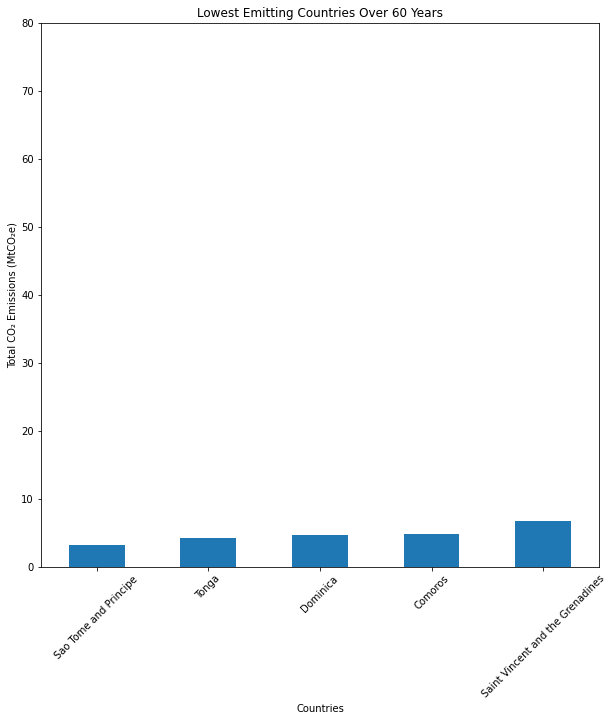

In [17]:
#bar plot of the lowest emitters
low_bar = lowest_emitters["60 Year Total"].plot.bar(title = "Lowest Emitting Countries Over 60 Years", figsize=(10,10))
plt.ylabel("Total CO₂ Emissions (MtCO₂e)")
plt.xlabel("Countries")
plt.xticks(rotation=45) 
plt.ylim(0, 80)

plt.savefig('Lowest Emitting Countries Over 60 Years.png',bbox_inches='tight')

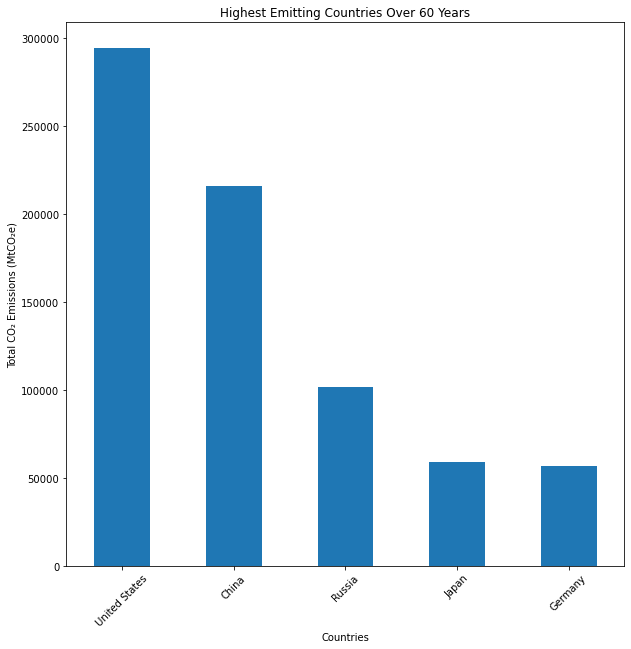

In [18]:
#bar plot of the highest emitters
high_bar = highest_emitters["60 Year Total"].plot.bar(title = "Highest Emitting Countries Over 60 Years", figsize=(10,10))
plt.ylabel("Total CO₂ Emissions (MtCO₂e)")
plt.xlabel("Countries")
plt.xticks(rotation=45) 

plt.savefig('Highest Emitting Countries Over 60 Years.png',bbox_inches='tight')

## Regression Lines for Carbon Emission Growth per Country

['y=437.37x+-819180.59', 'y=1704.18x+-3346858.26', 'y=41.59x+-65656.38', 'y=157.94x+-303664.44', 'y=-38.29x+85432.53']
['United States', 'China', 'Russia', 'Japan', 'Germany']


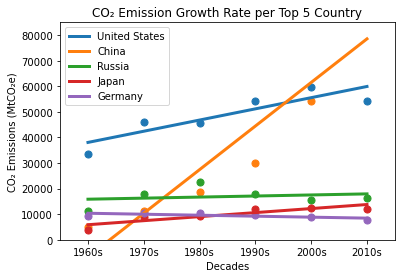

In [19]:
#scatter for highest emitting countries
years_list = [1960,1970,1980,1990,2000,2010]
year_str = ['1960s','1970s','1980s','1990s','2000s','2010s']
eqn = []
country_names = ['United States','China','Russia','Japan','Germany']

years = pd.DataFrame(years_list)
years = years.rename(columns={0:'Years'})

#iterate through each row of countries
for country in range(0,5):
    country_data = []
    
    #iterate through each column per country (row)
    for count in year_str:
        #make a new list for each of the countries
        country_data.append(highest_emitters[count][country])
    
    #plot the points per country into a scatter. Each list gets reset per country
    plt.scatter(years,country_data, s=50)

    #linear regression equation
    slope, intercept, r_value, p_value, std_err = st.linregress(years['Years'], country_data)
    eqn.append(f'y={round(slope,2)}x+{round(intercept,2)}')
    
    #Line of linear regression plot
    lin_reg = slope*years['Years'] + intercept
    plt.plot(years['Years'],lin_reg, lw = 3)  


    
#labeling scatter plot 
plt.legend(country_names)
plt.xlabel("Decades")
plt.ylabel("CO₂ Emissions (MtCO₂e)")
plt.title("CO₂ Emission Growth Rate per Top 5 Country")
plt.xlim(1955,2015)
plt.ylim(0,85000)

#manually set the x-axis ticks as the decades
plt.xticks(years_list,year_str)

#print the equations of each country regression
print(eqn)
print(country_names)

#set figure size and save
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('CO₂ Emission Growth Rate per Top 5 Country',bbox_inches='tight')
plt.show()


## Line Graph of Growth in Carbon Emission

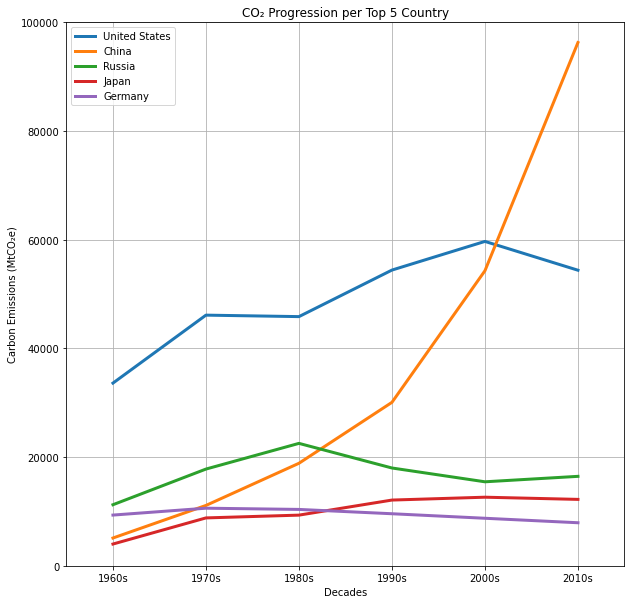

In [20]:
#iterate through each row of countries
for country in range(0,5):
    country_data = []
    
    #iterate through each column per country (row)
    for count in year_str:
        #make a new list for each of the countries
        country_data.append(highest_emitters[count][country])
    
    #plot the line graph
    plt.plot(years, country_data, lw = 3)
    plt.legend(country_names)
    
#labeling scatter plot 
plt.grid()
plt.legend(country_names)
plt.xlabel("Decades")
plt.ylabel("Carbon Emissions (MtCO₂e)")
plt.title("CO₂ Progression per Top 5 Country")
plt.xlim(1955,2015)
plt.ylim(0,100000)

#manually set the x-axis ticks as the decades
plt.xticks(years_list,year_str)

#labeling scatter plot 
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.titlepad'] = 25 
plt.rcParams['xtick.major.pad']='20'
plt.rcParams['ytick.major.pad']='20'

#save figure
plt.savefig('CO₂ Progression per Top 5 Country',bbox_inches='tight')

plt.show()


# Analyze Carbon Emission by Sector

## Filtering Data and Setting Up Data Frames

In [21]:
emission_data.head()

,Country,Sector,2019,2018,2017,2016,2015,2014,2013,2012,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,World,Total fossil fuels and cement,36440.76,36420.16,35694.69,35222.03,35211.04,35244.02,34987.54,34760.37,...,13692.37,12834.99,12171.81,11794.42,11270.46,10768.50,10237.22,9687.62,9354.19,9335.87
1,World,Coal,14362.56,14619.36,14414.18,14362.88,14623.02,14945.46,14919.81,14901.49,...,5503.33,5301.81,5243.18,5327.46,5279.82,5195.55,5100.29,4902.43,4917.09,5129.60
2,World,Oil,12354.11,12252.42,12175.47,11970.29,11915.33,11743.12,11629.54,11523.28,...,5964.99,5514.32,5063.65,4748.54,4411.46,4100.02,3806.90,3554.08,3304.93,3121.73
3,China,Total fossil fuels and cement,10174.68,9956.57,9750.73,9552.52,9683.20,9820.36,9796.53,9633.90,...,575.94,467.81,432.22,521.46,474.68,435.70,435.52,439.34,550.96,778.98
4,World,Gas,7615.71,7489.22,7115.49,6939.62,6763.74,6591.54,6540.24,6496.27,...,1711.09,1564.53,1436.29,1341.02,1234.77,1154.16,1047.90,967.30,883.02,835.39


In [22]:
#drop country column and the total sector rows
emission_data = emission_data.drop(columns = ['Country'])
sector_emissions = emission_data[emission_data.Sector != "Total fossil fuels and cement"]

sector_emissions.head()

,Sector,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
1,Coal,14362.56,14619.36,14414.18,14362.88,14623.02,14945.46,14919.81,14901.49,14747.60,...,5503.33,5301.81,5243.18,5327.46,5279.82,5195.55,5100.29,4902.43,4917.09,5129.60
2,Oil,12354.11,12252.42,12175.47,11970.29,11915.33,11743.12,11629.54,11523.28,11296.11,...,5964.99,5514.32,5063.65,4748.54,4411.46,4100.02,3806.90,3554.08,3304.93,3121.73
4,Gas,7615.71,7489.22,7115.49,6939.62,6763.74,6591.54,6540.24,6496.27,6371.70,...,1711.09,1564.53,1436.29,1341.02,1234.77,1154.16,1047.90,967.30,883.02,835.39
5,Coal,7235.95,7187.08,7137.26,7071.41,7266.98,7425.07,7493.45,7464.81,7309.79,...,501.18,412.72,383.60,469.77,432.99,401.57,406.13,411.93,522.48,748.38
9,Oil,2342.54,2350.09,2301.97,2285.33,2278.79,2242.39,2224.94,2182.23,2229.31,...,1781.63,1689.42,1589.19,1529.66,1464.69,1393.92,1359.26,1334.75,1297.32,1281.63


In [23]:
#drop null rows
sector_group = sector_emissions.dropna()

In [24]:
#group by the sector and sum the sectors per year
sector_group = sector_emissions.groupby("Sector")
sector_sum = sector_group.sum()
sector_sum

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
Sector,,,,,,,,,,,,,,,,,,,,,
Bunkers,115.12,113.58,113.58,113.58,117.25,120.91,120.91,117.25,117.25,113.58,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cement,3195.62,3095.72,3019.66,2990.11,2921.53,3031.86,2916.78,2806.70,2736.31,2554.88,...,625.07,595.97,556.12,537.76,504.03,481.67,436.70,413.39,386.45,366.08
Coal,29275.66,29945.75,29583.86,29500.28,30076.02,30713.13,30706.11,30702.52,30392.30,28744.10,...,12592.74,12141.88,12005.89,12208.00,12170.07,12059.47,11878.49,11403.62,11379.98,11780.67
Gas,15959.61,15680.81,14951.96,14577.75,14186.42,13813.84,13796.60,13726.80,13493.59,13231.50,...,3581.07,3261.35,2981.27,2776.00,2550.33,2383.11,2164.66,1998.52,1821.37,1720.63
Gas flaring,880.78,879.97,829.13,762.99,746.85,742.26,720.13,718.66,709.57,723.29,...,489.87,409.22,381.55,287.68,262.76,226.91,182.56,170.50,174.16,177.10
Oil,24616.77,24409.53,24284.35,23927.95,23825.08,23495.33,23295.24,23128.28,22706.65,22778.26,...,12779.89,11778.75,10777.88,10103.25,9352.80,8650.09,7988.82,7392.77,6816.44,6424.22


In [25]:
#get the total 60 year emission for every country and add as new column
sector_sum['60 Year Total'] = sector_sum.sum(axis=1)
sector_sum

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1968,1967,1966,1965,1964,1963,1962,1961,1960,60 Year Total
Sector,,,,,,,,,,,,,,,,,,,,,
Bunkers,115.12,113.58,113.58,113.58,117.25,120.91,120.91,117.25,117.25,113.58,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3562.90
Cement,3195.62,3095.72,3019.66,2990.11,2921.53,3031.86,2916.78,2806.70,2736.31,2554.88,...,595.97,556.12,537.76,504.03,481.67,436.70,413.39,386.45,366.08,84148.40
Coal,29275.66,29945.75,29583.86,29500.28,30076.02,30713.13,30706.11,30702.52,30392.30,28744.10,...,12141.88,12005.89,12208.00,12170.07,12059.47,11878.49,11403.62,11379.98,11780.67,1149652.69
Gas,15959.61,15680.81,14951.96,14577.75,14186.42,13813.84,13796.60,13726.80,13493.59,13231.50,...,3261.35,2981.27,2776.00,2550.33,2383.11,2164.66,1998.52,1821.37,1720.63,485937.89
Gas flaring,880.78,879.97,829.13,762.99,746.85,742.26,720.13,718.66,709.57,723.29,...,409.22,381.55,287.68,262.76,226.91,182.56,170.50,174.16,177.10,33074.80
Oil,24616.77,24409.53,24284.35,23927.95,23825.08,23495.33,23295.24,23128.28,22706.65,22778.26,...,11778.75,10777.88,10103.25,9352.80,8650.09,7988.82,7392.77,6816.44,6424.22,1105205.44


In [26]:
#make a new data frame with only the total per sector
sector_sixty = sector_sum['60 Year Total']
sector_sixty = pd.DataFrame(sector_sixty)
sector_sixty

,60 Year Total
Sector,
Bunkers,3562.90
Cement,84148.40
Coal,1149652.69
Gas,485937.89
Gas flaring,33074.80
Oil,1105205.44


## Bar chart for every sector over 60 years

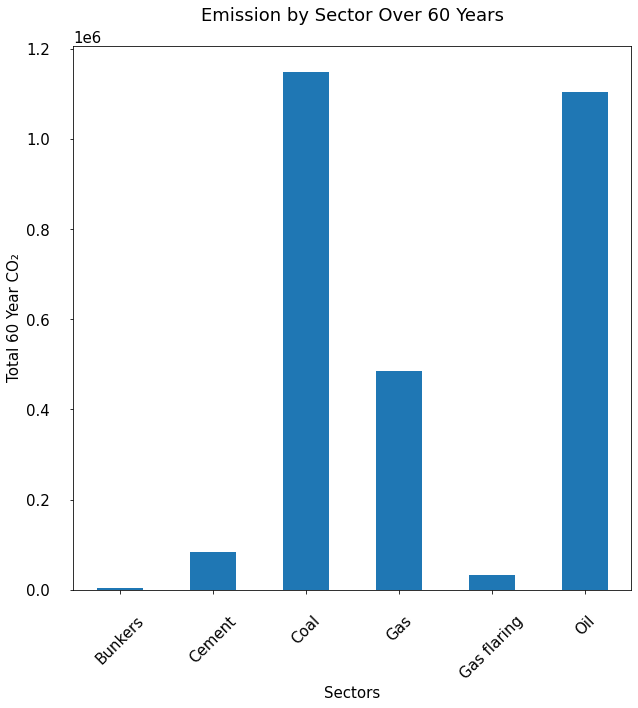

In [27]:
#bar chart of the sector totals
sector_bar = sector_sixty["60 Year Total"].plot.bar(title = "Emission by Sector Over 60 Years")
plt.ylabel("Total 60 Year CO₂")
plt.xlabel("Sectors")
plt.xticks(rotation=45) 

plt.savefig('Emission by Sector Over 60 Years',bbox_inches='tight')

## Pie chart for ever sector over 60 years

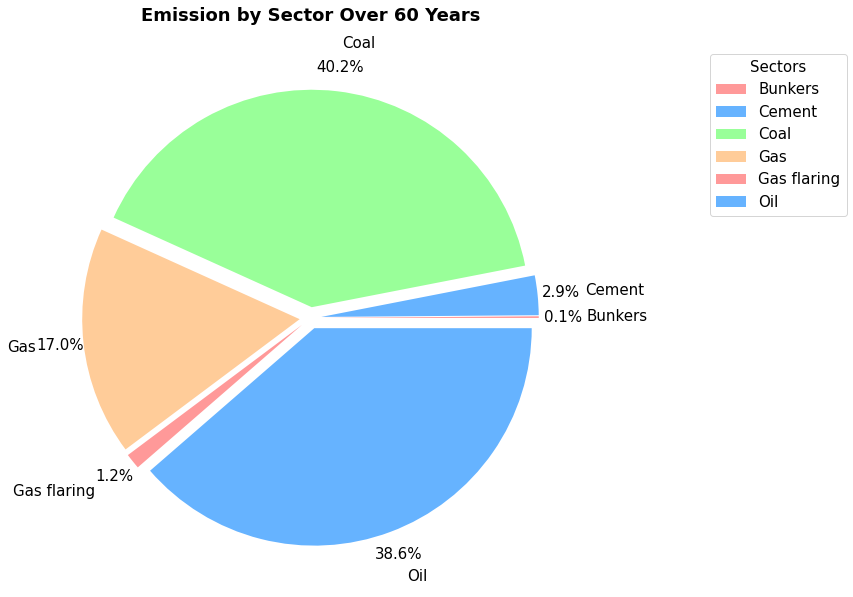

In [28]:
#pie chart of sector totals
sector_pie = sector_sixty["60 Year Total"].plot.pie(title = "Emission by Sector Over 60 Years",
                                                    autopct = '%1.1f%%',
                                                    explode = [0.05,0.05,0.05,0.05,0.05,0.05],
                                                    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                                                    pctdistance=1.11, labeldistance=1.22)

plt.title("Emission by Sector Over 60 Years", fontweight="bold")

plt.ylabel("")

plt.legend(loc="best", bbox_to_anchor=(1.5,1), title="Sectors")

sector_pie

plt.savefig('Emission by Sector Over 60 Years',bbox_inches='tight')

## Prepare data for line graph

In [29]:
#drop the sum column for the annual line graph
sector_emission = sector_sum.drop(columns = ["60 Year Total"])
sector_emission

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
Sector,,,,,,,,,,,,,,,,,,,,,
Bunkers,115.12,113.58,113.58,113.58,117.25,120.91,120.91,117.25,117.25,113.58,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cement,3195.62,3095.72,3019.66,2990.11,2921.53,3031.86,2916.78,2806.70,2736.31,2554.88,...,625.07,595.97,556.12,537.76,504.03,481.67,436.70,413.39,386.45,366.08
Coal,29275.66,29945.75,29583.86,29500.28,30076.02,30713.13,30706.11,30702.52,30392.30,28744.10,...,12592.74,12141.88,12005.89,12208.00,12170.07,12059.47,11878.49,11403.62,11379.98,11780.67
Gas,15959.61,15680.81,14951.96,14577.75,14186.42,13813.84,13796.60,13726.80,13493.59,13231.50,...,3581.07,3261.35,2981.27,2776.00,2550.33,2383.11,2164.66,1998.52,1821.37,1720.63
Gas flaring,880.78,879.97,829.13,762.99,746.85,742.26,720.13,718.66,709.57,723.29,...,489.87,409.22,381.55,287.68,262.76,226.91,182.56,170.50,174.16,177.10
Oil,24616.77,24409.53,24284.35,23927.95,23825.08,23495.33,23295.24,23128.28,22706.65,22778.26,...,12779.89,11778.75,10777.88,10103.25,9352.80,8650.09,7988.82,7392.77,6816.44,6424.22


In [30]:
#make a new list with all years
sector_years = sector_emission.columns
sector_years

Index(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993',
       '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984',
       '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975',
       '1974', '1973', '1972', '1971', '1970', '1969', '1968', '1967', '1966',
       '1965', '1964', '1963', '1962', '1961', '1960'],
      dtype='object')

In [31]:
#transpose sector dataframe to have years as rows
sector_transposed = sector_emission.T
sector_transposed["Years"] = sector_years
sector_transposed = sector_transposed.set_index("Years")
sector_transposed = sector_transposed.sort_values("Years")
sector_transposed.head()

Sector,Bunkers,Cement,Coal,Gas,Gas flaring,Oil
Years,,,,,,
1960,0.0,366.08,11780.67,1720.63,177.10,6424.22
1961,0.0,386.45,11379.98,1821.37,174.16,6816.44
1962,0.0,413.39,11403.62,1998.52,170.50,7392.77
1963,0.0,436.70,11878.49,2164.66,182.56,7988.82
1964,0.0,481.67,12059.47,2383.11,226.91,8650.09


## Line Graph for Each Sector over 60 Years

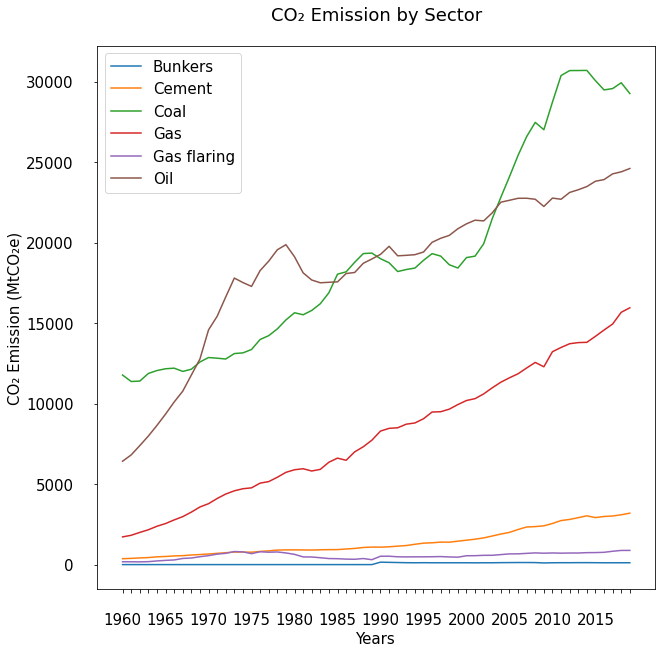

In [32]:
#line graph of the sector growth over 60 years
plt.plot(sector_transposed)
plt.rcParams['figure.figsize'] = (15,8)
plt.legend(sector_transposed.columns)
plt.xlabel("Years")
plt.ylabel("CO₂ Emission (MtCO₂e)")
plt.title("CO₂ Emission by Sector")
# plt.xlim(1955,2015)
# plt.ylim(0,30000)

#set axis by 5's
x_axis = []
for i in range(1960,2020):
    if i % 5 == 0:
        x_axis.append(i)
    else:
        x_axis.append('')
          
sector_years = sector_years.sort_values()
plt.xticks(sector_years,x_axis)



plt.savefig('CO₂ Emission by Sector',bbox_inches='tight')

plt.show()
